# **특징추출 구현하기**

**구글 드라이브 마운트**

먼저, 구글 드라이브에 MNIST_digit159.csv를 업로드하고, 이를 사용하기 위해 구글 드라이브를 마운트한다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**데이터 로드 및 시각화**

MNIST_digit159.csv는 3개의 클래스(1, 5, 9)에 대해 300개씩의 데이터를 가진다.

총 900x785 차원(마지막 열의 값이 클래스 라벨)으로, 900x784 차원의 데이터와 900x1 차원의 클래스 라벨로 구성되어 있다.

아래 코드를 통해 숫자 데이터를 로드하고 시각화한다.

(900, 785)
(900, 784)
(900,)
(900, 28, 28)


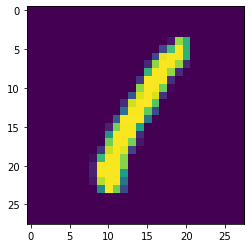

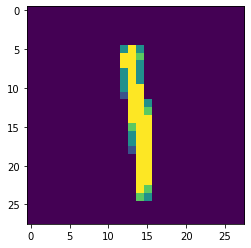

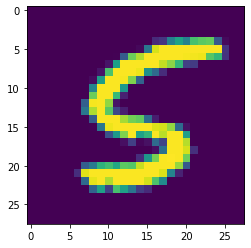

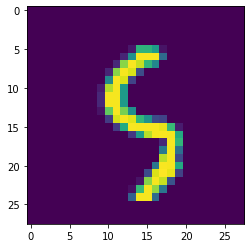

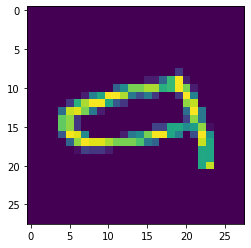

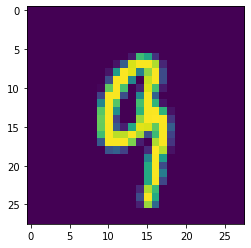

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pandas 라이브러리를 사용하여 데이터 로드하기
df = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MNIST_digit159.csv',header=None)
data=np.array(df)
print(data.shape)     # 900x785 차원

# 데이터 변수와 클래스 변수에 할당
x_data=data[:, 0:784]   # 900x784 차원의 데이터
y_data=data[:, 784]     # 900X1 차원의 클래스 라벨
print(x_data.shape)
print(y_data.shape)

# 시각화를 위해 784 차원의 데이터를 28x28로 reshape
X = np.array([np.reshape(t, (28, 28)) for t in x_data]) 
print(X.shape)

# 각 클래스별로 2개의 데이터 시각화
for i in range(2):
  t = X[i, :, :]
  plt.imshow(t)
  plt.show()
  
for i in range(2):
  t = X[300+i, :, :]
  plt.imshow(t)
  plt.show()  
  
for i in range(2):
  t=X[600+i, :, :]
  plt.imshow(t)
  plt.show()  

**1. 주성분분석법(PCA)으로 특징추출하기**

900x784 차원의 데이터를 2차원으로 차원 축소하고, 추출된 특징을 산점도로 그려 본다.

사용자는 각자의 요구에 따라 라이브러리로부터 호출된 모듈을 통해 해당 모듈에 의해 생성된 attributes을 확인할 수 있다. 

여기에서는 components, means, explained_variable_ratio를 확인해 본다.

2차원 PCA 차원축소 => (900, 2)


(2, 784)
(784,)
[0.16392668 0.08195144]




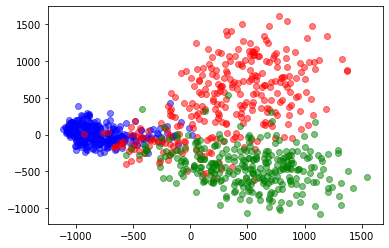

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)   # n_components는 축소할 차원 수
z_pca = pca.fit_transform(x_data)

print('%d차원 PCA 차원축소 =>' % (pca.n_components), z_pca.shape)
print('\n')

# attributes 확인하기
#print(pca.components_) # 주성분
print(pca.components_.shape) 
#print(pca.mean_) # 평균
print(pca.mean_.shape) 
print(pca.explained_variance_ratio_)   # 주성분이 포괄하는 데이터의 비율
print('\n')

# 추출된 특징의 산점도 그리기
plt.scatter(np.array(z_pca[0:300, 0]), np.array(z_pca[0:300, 1]), c = 'b', alpha = 0.5)
plt.scatter(np.array(z_pca[300:600, 0]), np.array(z_pca[300:600, 1]), c = 'r', alpha = 0.5)
plt.scatter(np.array(z_pca[600:900, 0]), np.array(z_pca[600:900, 1]), c = 'g', alpha = 0.5)

**2. 선형판별분석법(LDA)으로 특징추출하기**

900x784 차원의 데이터를 '클래스 개수 -1'차원으로 축소하고, predict 함수를 통해 하나의 입력된 데이터에 대해 클래스를 예측해 본다.

여기에서는 데이터의 클래스가 총 3개로, 최대 2차원의 LDA 특징추출이 가능하다.

(3, 784)
[0.64803236 0.35196764]


마지막 데이터의 클래스는 :  [3]




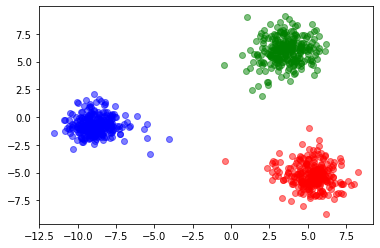

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis() # n_components 설정하지 않으면 '클래스 개수 - 1'로 설정됨
z_lda = lda.fit_transform(x_data, y_data)  # LDA는 클래스 정보를 활용

# attributes 확인
print(lda.means_.shape)  # class-wise 평균
print(lda.explained_variance_ratio_)
print('\n')

# predict 함수로 입력 데이터에 대한 클래스 예측 가능
print("마지막 데이터의 클래스는 : ", lda.predict([x_data[899, :]])) # 1 => 1, 2 => 5, 3 => 9
print('\n')

# 추출된 특징의 산점도 그리기
plt.scatter(np.array(z_lda[0:300, 0]), np.array(z_lda[0:300, 1]), c = 'b', alpha = 0.5)
plt.scatter(np.array(z_lda[300:600, 0]), np.array(z_lda[300:600, 1]), c = 'r', alpha = 0.5)
plt.scatter(np.array(z_lda[600:900, 0]), np.array(z_lda[600:900, 1]), c = 'g', alpha = 0.5)

LDA를 통해 추출된 특징값을 산점도로 표현한 결과, PCA에 비해 클래스 간의 구분이 뚜렷한 특징값이 추출됨을 알 수 있다.

**3. 다차원 척도법(MDS)으로 특징추출하기**


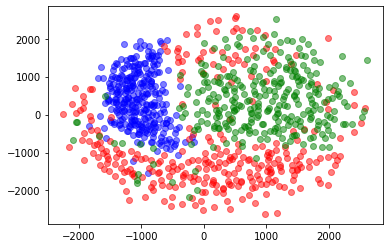

In [5]:
from sklearn.manifold import MDS

# 파라미터로 n_init(실행당 초기화 횟수), max_iter(최적화를 위한 반복 횟수) 등을 설정 가능
mds = MDS(n_components = 2, n_init = 5, max_iter = 300)
z_mds = mds.fit_transform(x_data)

plt.scatter(np.array(z_mds[0:300, 0]), np.array(z_mds[0:300, 1]), c = 'b', alpha = 0.5)
plt.scatter(np.array(z_mds[300:600, 0]), np.array(z_mds[300:600, 1]), c = 'r', alpha = 0.5)
plt.scatter(np.array(z_mds[600:900, 0]), np.array(z_mds[600:900, 1]), c = 'g', alpha = 0.5)

**4. 통계적 이웃 임베딩 방법(t-SNE)으로 특징추출하기**


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


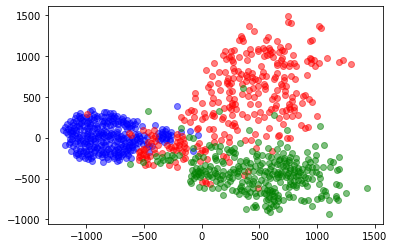

In [6]:
from sklearn.manifold import TSNE

# 파라미터로 learning_rate(학습률), n_iter(최적화를 위한 반복 횟수), init(t-SNE 전 차원 축소 방법) 등 설정 가능
tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'pca')
z_tsne = tsne.fit_transform(x_data)

plt.scatter(np.array(z_tsne[0:300, 0]), np.array(z_tsne[0:300, 1]), c = 'b', alpha = 0.5)
plt.scatter(np.array(z_tsne[300:600, 0]), np.array(z_tsne[300:600, 1]), c = 'r', alpha = 0.5)
plt.scatter(np.array(z_tsne[600:900, 0]), np.array(z_tsne[600:900, 1]), c = 'g', alpha = 0.5)